<a href="https://colab.research.google.com/github/JasmineVan/OverfittingPrevention/blob/main/51800128_51800897_Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [ ]:
df = pd.read_csv('online_shoppers_intention.csv')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

(12330, 18)

In [ ]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


#Data Visualize

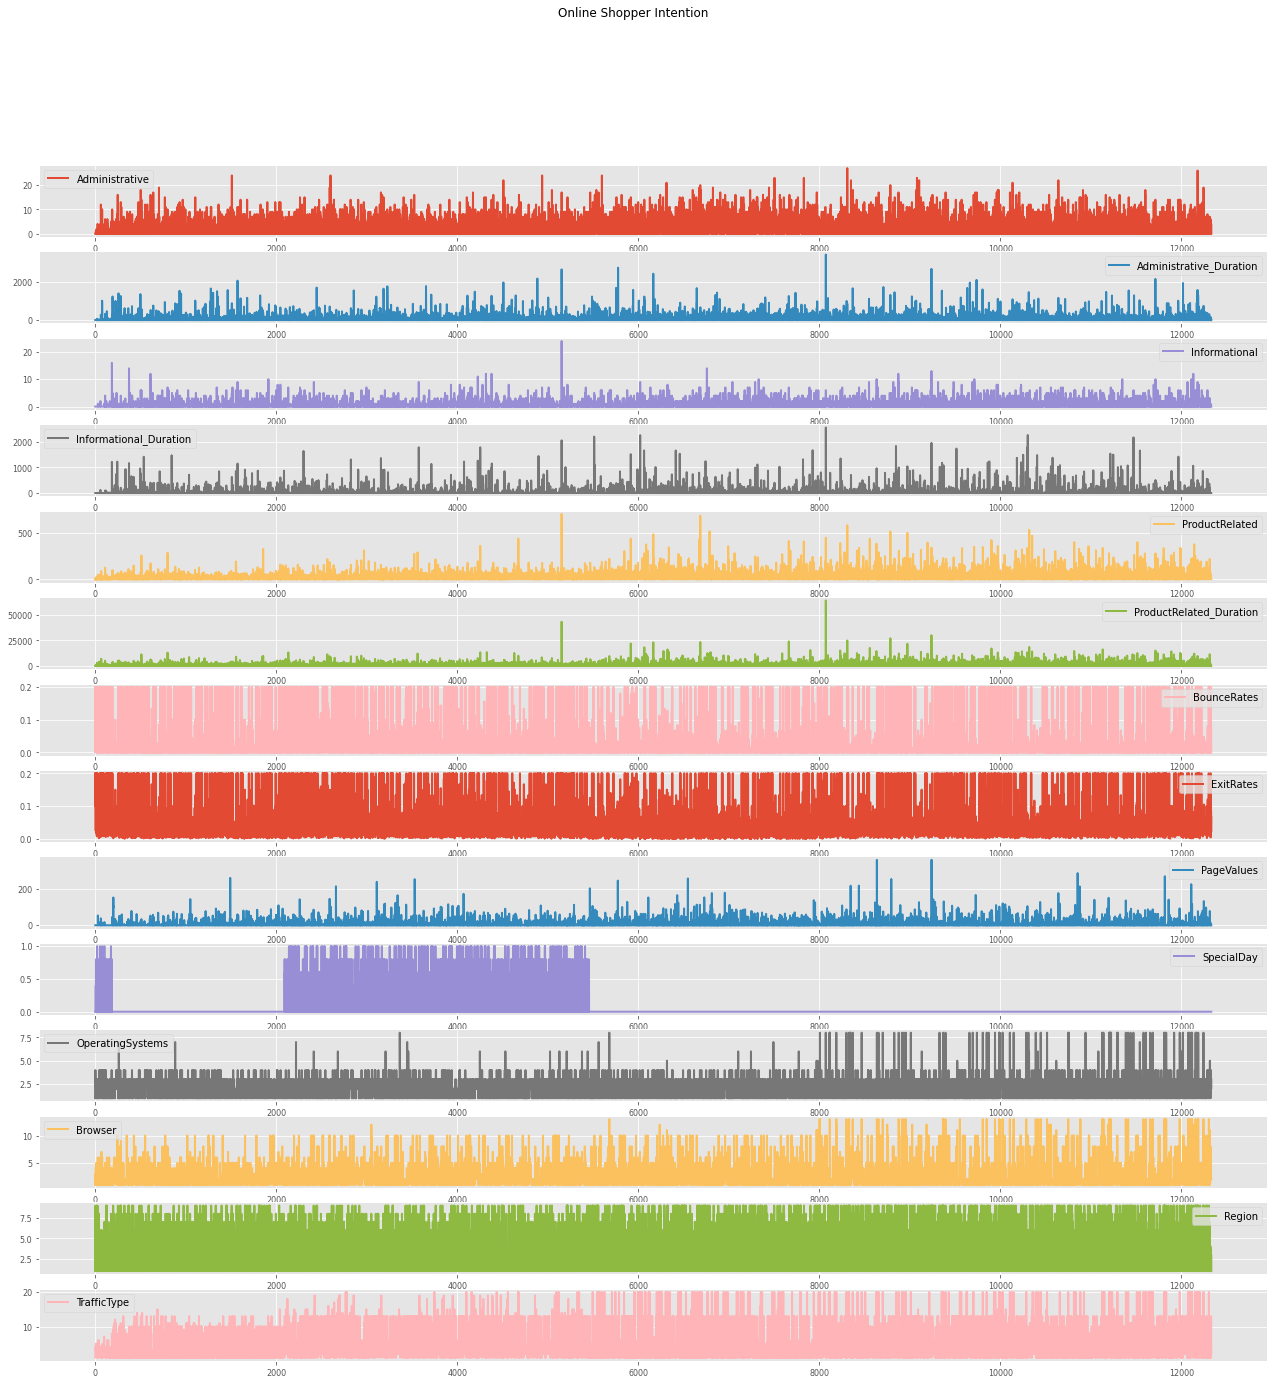

In [ ]:
plt.style.use('ggplot')
df.plot(subplots=True,
        layout=(14, 1),
        figsize=(22,22),
        fontsize=8, 
        linewidth=2,
        sharex=False,
        title='Online Shopper Intention')
plt.show()

#Data Preprocessing

In [ ]:
from sklearn import preprocessing
df = df.apply(preprocessing.LabelEncoder().fit_transform)

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
print(X)
print(y)

[[  0   0   0 ...   0   2   0]
 [  0   0   0 ...   1   2   0]
 [  0   0   0 ...   2   2   0]
 ...
 [  0   0   0 ...  12   2   1]
 [  4 761   0 ...  10   2   0]
 [  0   0   0 ...   1   0   1]]
[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X = minmax.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('Train:')
print(X_train.shape)
print(y_train.shape)
print('Test:')
print(X_test.shape)
print(y_test.shape)

Train:
(8631, 17)
(8631,)
Test:
(3699, 17)
(3699,)


#Model and Overfitting

Epoch 1/200
17/17 [==============================] - 1s 16ms/step - loss: 0.1168 - val_loss: 0.1134
Epoch 2/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0942 - val_loss: 0.1018
Epoch 3/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0856 - val_loss: 0.0951
Epoch 4/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0826 - val_loss: 0.0941
Epoch 5/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0815 - val_loss: 0.0937
Epoch 6/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0797 - val_loss: 0.0905
Epoch 7/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0783 - val_loss: 0.0893
Epoch 8/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0772 - val_loss: 0.0890
Epoch 9/200
17/17 [==============================] - 0s 6ms/step - loss: 0.0763 - val_loss: 0.0883
Epoch 10/200
17/17 [==============================] - 0s 7ms/step - loss: 0.0748 - val_loss: 0.0867
Epoch 11

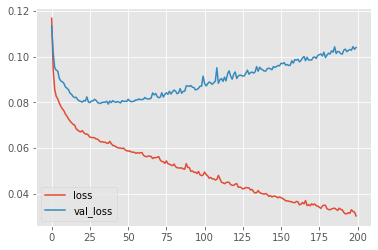

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(2)
])
model.compile(
    optimizer='adam',
    loss='mse',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=200,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

#Overfitting Solution: Simple model, regularization


Epoch 1/50
17/17 [==============================] - 1s 13ms/step - loss: 6.7157 - val_loss: 6.0260
Epoch 2/50
17/17 [==============================] - 0s 6ms/step - loss: 5.4452 - val_loss: 4.8351
Epoch 3/50
17/17 [==============================] - 0s 6ms/step - loss: 4.3176 - val_loss: 3.7775
Epoch 4/50
17/17 [==============================] - 0s 6ms/step - loss: 3.3250 - val_loss: 2.8567
Epoch 5/50
17/17 [==============================] - 0s 5ms/step - loss: 2.4668 - val_loss: 2.0713
Epoch 6/50
17/17 [==============================] - 0s 6ms/step - loss: 1.7445 - val_loss: 1.4210
Epoch 7/50
17/17 [==============================] - 0s 7ms/step - loss: 1.1569 - val_loss: 0.9041
Epoch 8/50
17/17 [==============================] - 0s 7ms/step - loss: 0.7065 - val_loss: 0.5305
Epoch 9/50
17/17 [==============================] - 0s 7ms/step - loss: 0.3942 - val_loss: 0.2881
Epoch 10/50
17/17 [==============================] - 0s 6ms/step - loss: 0.2126 - val_loss: 0.1767
Epoch 11/50
17/17 

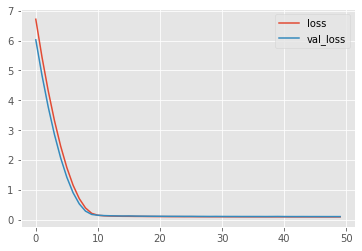

In [ ]:
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1()),
    layers.Dense(4, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.Dense(2)
])

model.compile(
    optimizer='adam',
    loss='mse',
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));